<a href="https://colab.research.google.com/github/Saloni-2019/Exploratory-analysis-of-Indian-Startups-Funding/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exploration Analysis of dataset containing information about the startups funding in India.

This dataset has funding information of the Indian startups from January 2015 to August 2017. It includes columns with the date funded, the city the startup is based out of, the names of the funders, and the amount invested (in USD).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

Importing dataset

In [2]:
df = pd.read_csv("startup_funding.csv")

In [3]:
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [4]:
df.shape

(2372, 10)

In [5]:
df.nunique()

SNo                 2372
Date                 701
StartupName         2001
IndustryVertical     743
SubVertical         1364
CityLocation          71
InvestorsName       1885
InvestmentType         7
AmountInUSD          329
Remarks               69
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2372 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               2372 non-null   int64 
 1   Date              2372 non-null   object
 2   StartupName       2372 non-null   object
 3   IndustryVertical  2201 non-null   object
 4   SubVertical       1436 non-null   object
 5   CityLocation      2193 non-null   object
 6   InvestorsName     2364 non-null   object
 7   InvestmentType    2371 non-null   object
 8   AmountInUSD       1525 non-null   object
 9   Remarks           419 non-null    object
dtypes: int64(1), object(9)
memory usage: 185.4+ KB


Checking out number of null values to know abt the missing data

In [7]:
df.isnull().sum()

SNo                    0
Date                   0
StartupName            0
IndustryVertical     171
SubVertical          936
CityLocation         179
InvestorsName          8
InvestmentType         1
AmountInUSD          847
Remarks             1953
dtype: int64

Exploring data

In [9]:
df["AmountInUSD"] = df["AmountInUSD"].apply(lambda x: float(str(x).replace(",","")))

In [10]:
df["AmountInUSD"]

0       1300000.0
1             NaN
2             NaN
3        500000.0
4        850000.0
          ...    
2367    4500000.0
2368     825000.0
2369    1500000.0
2370          NaN
2371     140000.0
Name: AmountInUSD, Length: 2372, dtype: float64

In [11]:
df["AmountInUSD"].min()

16000.0

In [12]:
round(df["AmountInUSD"].mean(),2)

12031073.1

In [14]:
df["AmountInUSD"].median()

1070000.0

In [15]:
df["AmountInUSD"].max()

1400000000.0

In [16]:
round(df["AmountInUSD"].std(),2)

64031175.13

Creating a new feature - AmountInUSD_log to better visualize the value distributions

<ipython-input-17-7b6a0fa251e2>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AmountInUSD_log'].dropna())


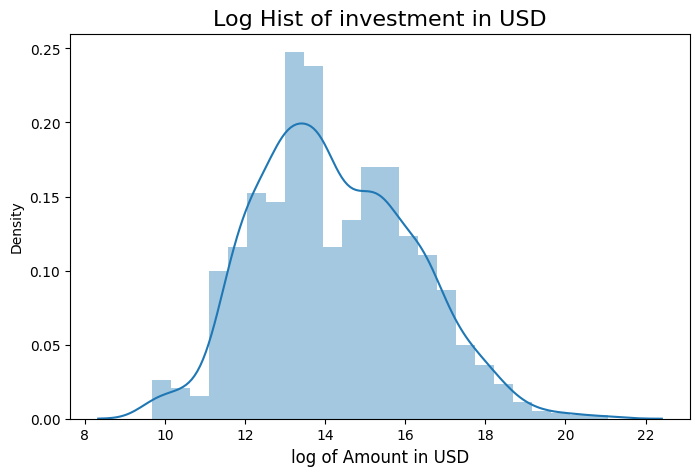

In [17]:
df['AmountInUSD_log'] = np.log(df["AmountInUSD"] + 1)

plt.figure(figsize=(8,5))
sns.distplot(df['AmountInUSD_log'].dropna())
plt.xlabel('log of Amount in USD', fontsize=12)
plt.title("Log Hist of investment in USD", fontsize=16)
plt.show()

Description of Investment Types: 
Seed Funding      1271
Private Equity    1066
SeedFunding         30
Debt Funding         1
PrivateEquity        1
Crowd funding        1
Crowd Funding        1
Name: InvestmentType, dtype: int64


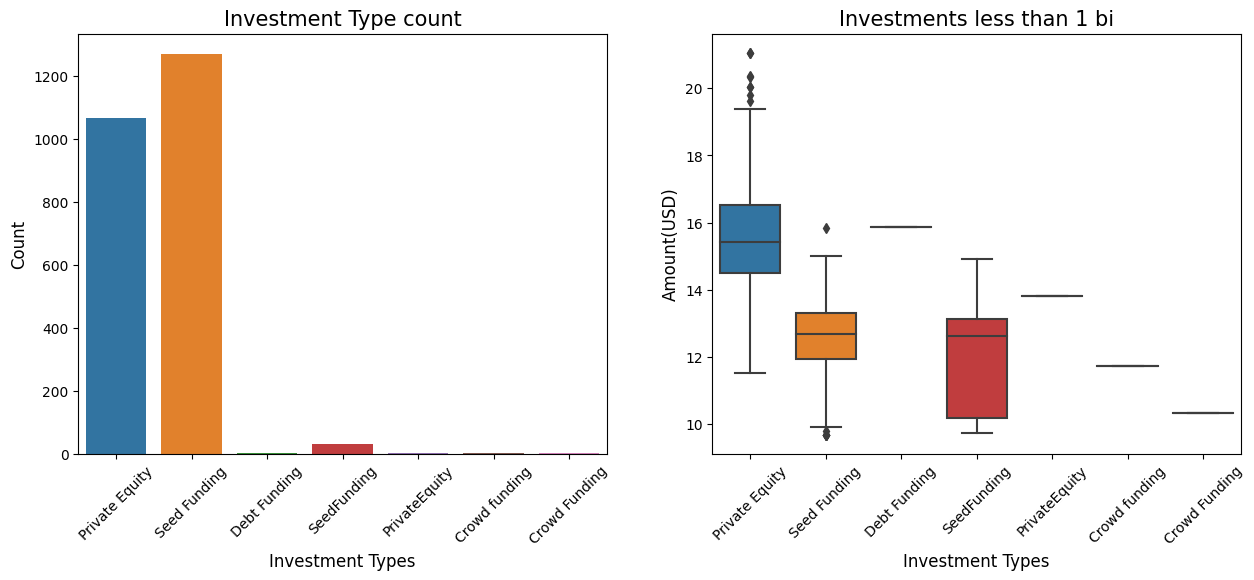

In [22]:
InvestmentTypeVC = df.InvestmentType.value_counts()
print("Description of Investment Types: ")
print(InvestmentTypeVC)

plt.figure(figsize = (15,12))
plt.subplot(221)

g = sns.countplot(x="InvestmentType", data=df)
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investment Type count", fontsize=15)
g.set_xlabel("Investment Types", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(222)
g1 = sns.boxplot(x="InvestmentType", y="AmountInUSD_log",
            data=df)
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Investments less than 1 bi", fontsize=15)
g1.set_xlabel("Investment Types", fontsize=12)
g1.set_ylabel("Amount(USD)", fontsize=12)

plt.show()

See the main investors

Description count of Investors
Undisclosed Investors       33
Undisclosed investors       27
Ratan Tata                  24
Indian Angel Network        24
Kalaari Capital             16
Group of Angel Investors    15
Sequoia Capital             14
undisclosed investors       11
Brand Capital               10
Undisclosed Investor        10
RoundGlass Partners         10
Undisclosed                  9
Undisclosed investor         9
Accel Partners               9
SAIF Partners                9
Name: InvestorsName, dtype: int64


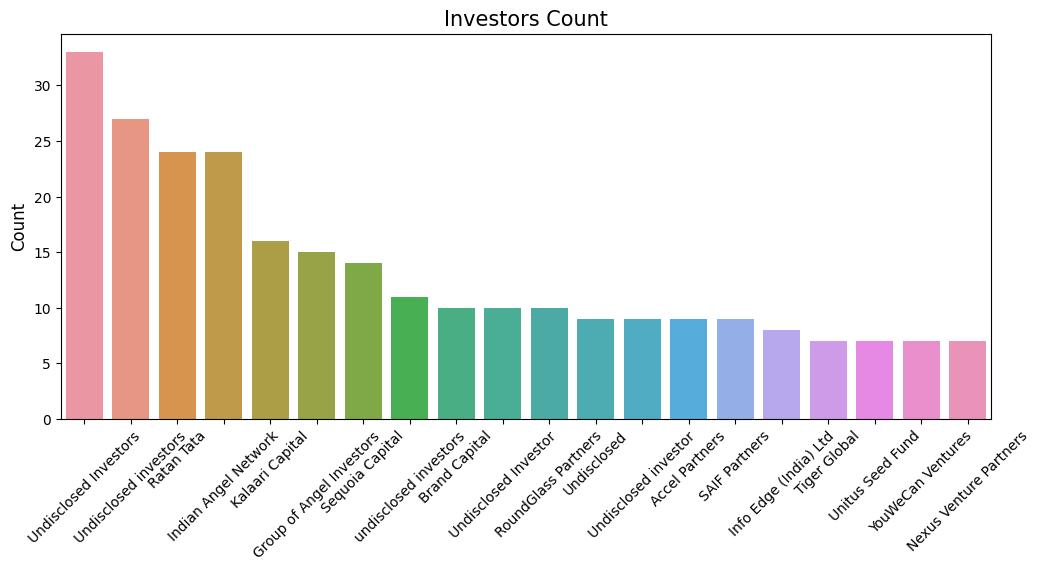

In [20]:
Investors = df.InvestorsName.value_counts()

print("Description count of Investors")
print(Investors[:15])

plt.figure(figsize = (12,5))
g = sns.barplot(x=Investors.index[:20],y=Investors.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Investors Count", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.show()

Description count of Location
Bangalore    627
Mumbai       446
New Delhi    381
Gurgaon      240
Pune          84
Name: CityLocation, dtype: int64


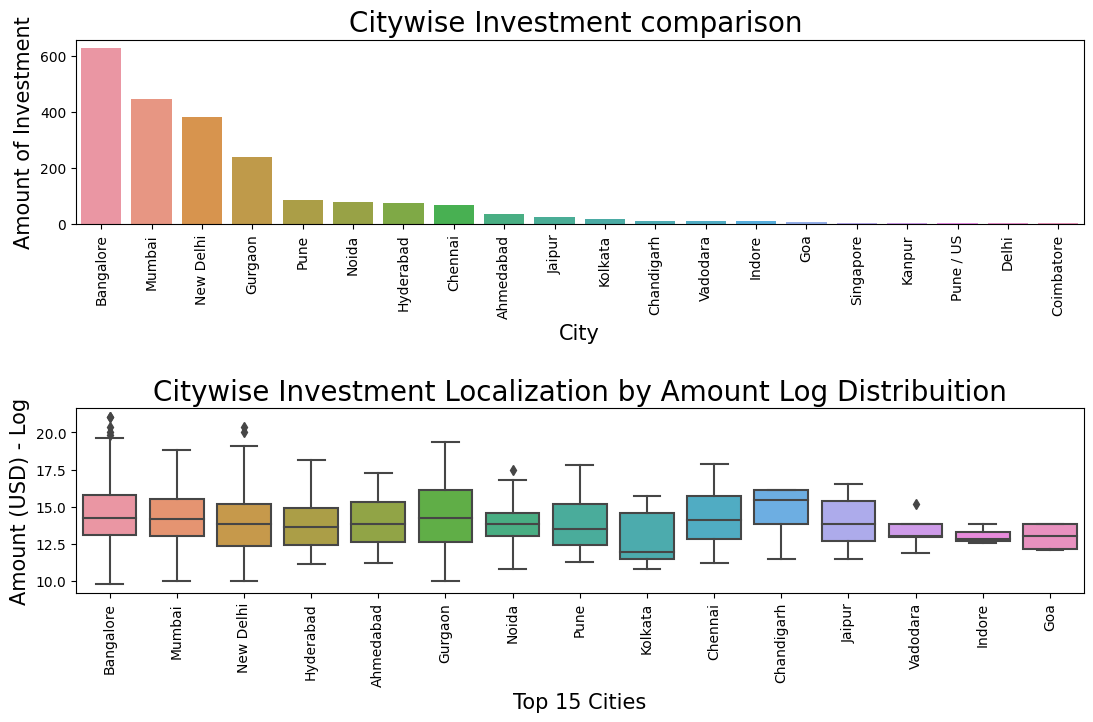

In [38]:
location = df['CityLocation'].value_counts()
print("Description count of Location")
print(location[:5])

plt.figure(figsize=(13,7))

plt.subplot(211)
sns.barplot(x=location.index[:20], y=location.values[:20])
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=15)
plt.ylabel('Amount of Investment', fontsize=15)
plt.title("Citywise Investment comparison ", fontsize=20)

plt.subplot(212)
g = sns.boxplot(x='CityLocation', y="AmountInUSD_log",data=df[df.CityLocation.isin(location[:15].index.values)])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Citywise Investment Localization by Amount Log Distribuition", fontsize=20)
g.set_xlabel("Top 15 Cities", fontsize=15)
g.set_ylabel("Amount (USD) - Log", fontsize=15)

plt.subplots_adjust(hspace = 1,top = 0.9)

plt.show()

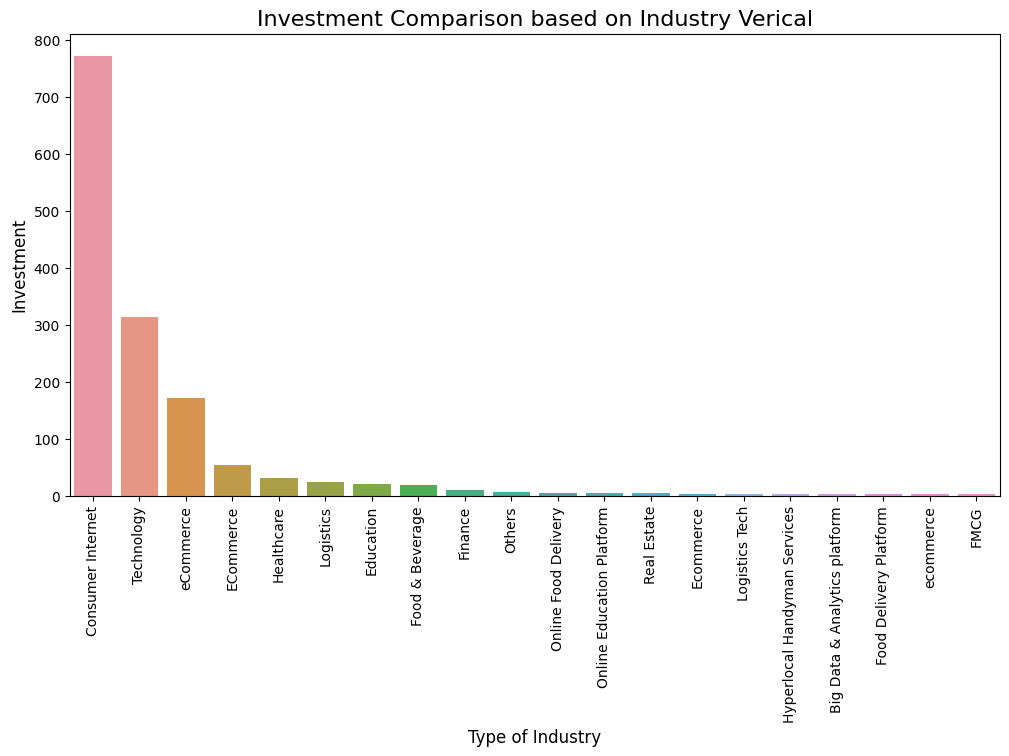

In [36]:
industry = df['IndustryVertical'].value_counts()[:20]

plt.figure(figsize=(12,6))
sns.barplot(x=industry.index, y=industry.values)
plt.xticks(rotation=90)
plt.xlabel("Type of Industry", fontsize=12)
plt.ylabel('Investment', fontsize=12)
plt.title("Investment Comparison based on Industry Verical", fontsize=16)
plt.show()

Exploring Consumer Internet Subvertical

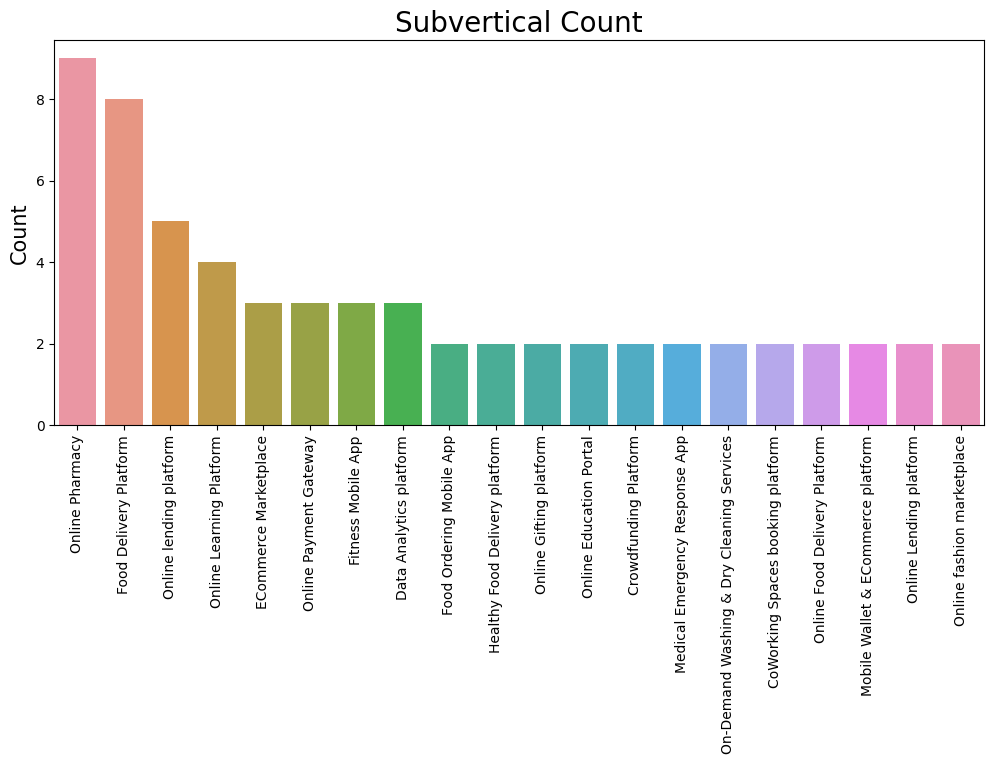

In [28]:
cons_sub = df['SubVertical'].value_counts()

plt.figure(figsize = (12,5))

g = sns.barplot(x=cons_sub.index[:20],y=cons_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Subvertical Count", fontsize=20)
g.set_xlabel("", fontsize=15)
g.set_ylabel("Count", fontsize=15)

plt.show()

Technology Subvertical

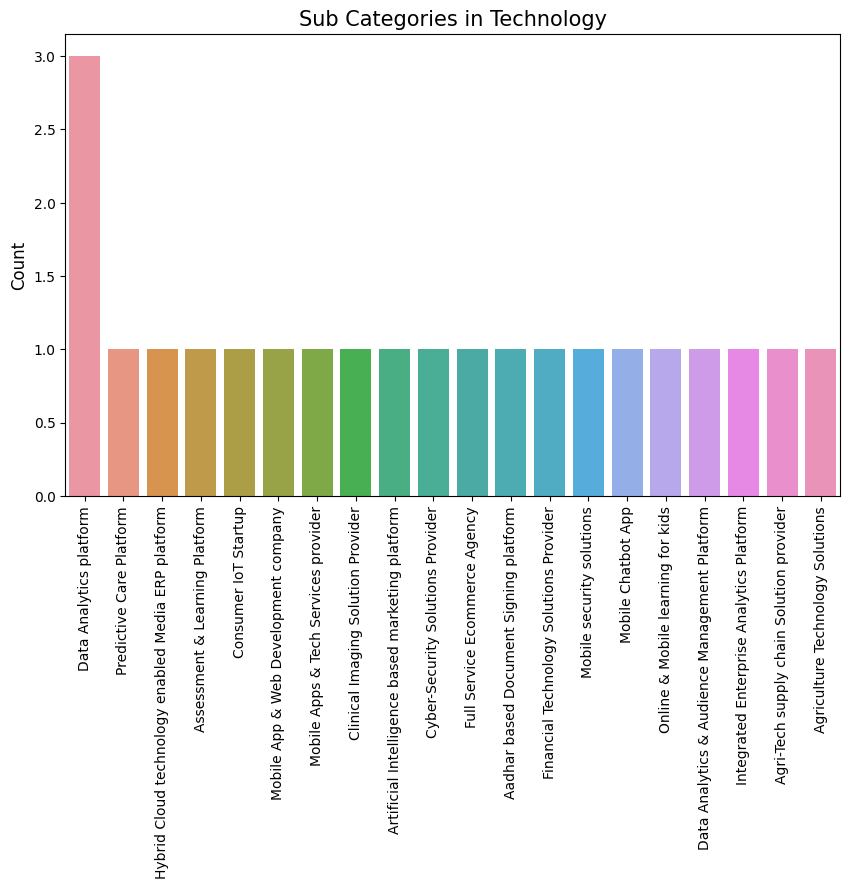

In [31]:
tech_sub = df[df['IndustryVertical'] == 'Technology']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:20],y=tech_sub.values[:20])
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title("Sub Categories in Technology", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

E-commerce Subvertical

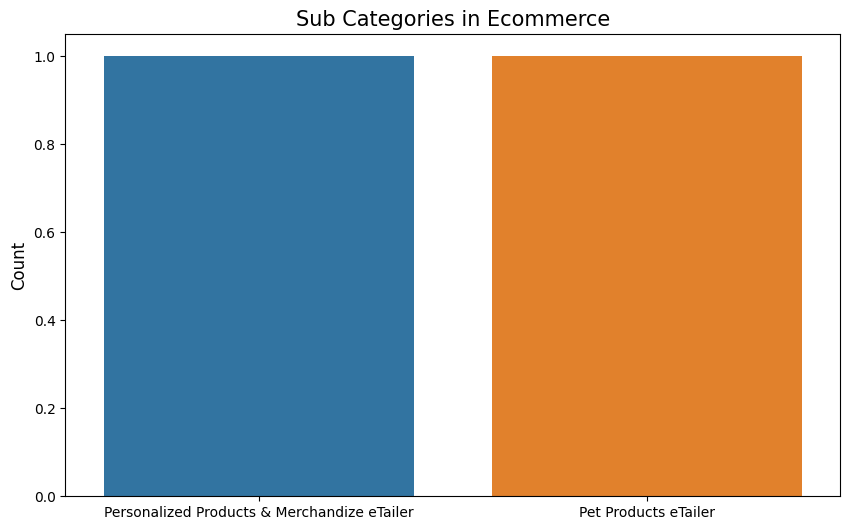

In [35]:
tech_sub = df[df['IndustryVertical'] == 'Ecommerce']['SubVertical'].value_counts()

plt.figure(figsize = (10,6))
g = sns.barplot(x=tech_sub.index[:2],y=tech_sub.values[:2])
g.set_xticklabels(g.get_xticklabels())
g.set_title("Sub Categories in Ecommerce", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.show()

Time of Investments

In [41]:
df.Date.replace((['12/05.2015', '13/04.2015','15/01.2015','22/01//2015']), \
                         ('12/05/2015','13/04/2015','15/01/2015','22/01/2015'), inplace=True)

In [43]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date_month_year'] = df['Date'].dt.to_period("M")
df['Date_year'] = df['Date'].dt.to_period("A")

<ipython-input-43-2ca8c9126a49>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


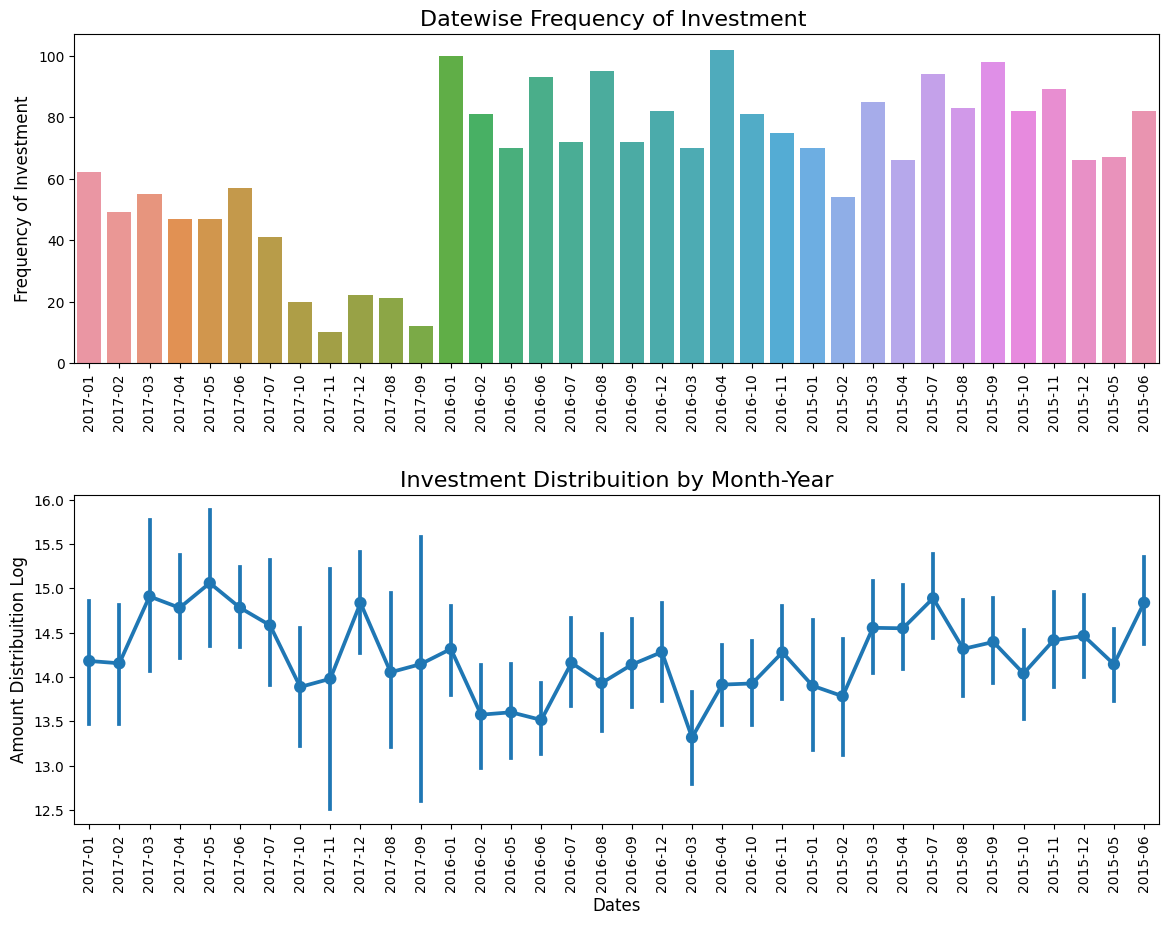

In [46]:
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot(x='Date_month_year', data=df)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=12)
plt.ylabel('Frequency of Investment', fontsize=12)
plt.title("Datewise Frequency of Investment ", fontsize=16)

plt.subplot(212)
sns.pointplot(x='Date_month_year', y='AmountInUSD_log', data=df)
plt.xticks(rotation=90)
plt.xlabel('Dates', fontsize=12)
plt.ylabel('Amount Distribuition Log', fontsize=12)
plt.title("Investment Distribuition by Month-Year", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

We can see the frequency of investment was higher in 2016 and 2015 as compared to 2017 but larger amount (in USD) of investments were made in 2017.

Wordcloud for Investors in E-commerce

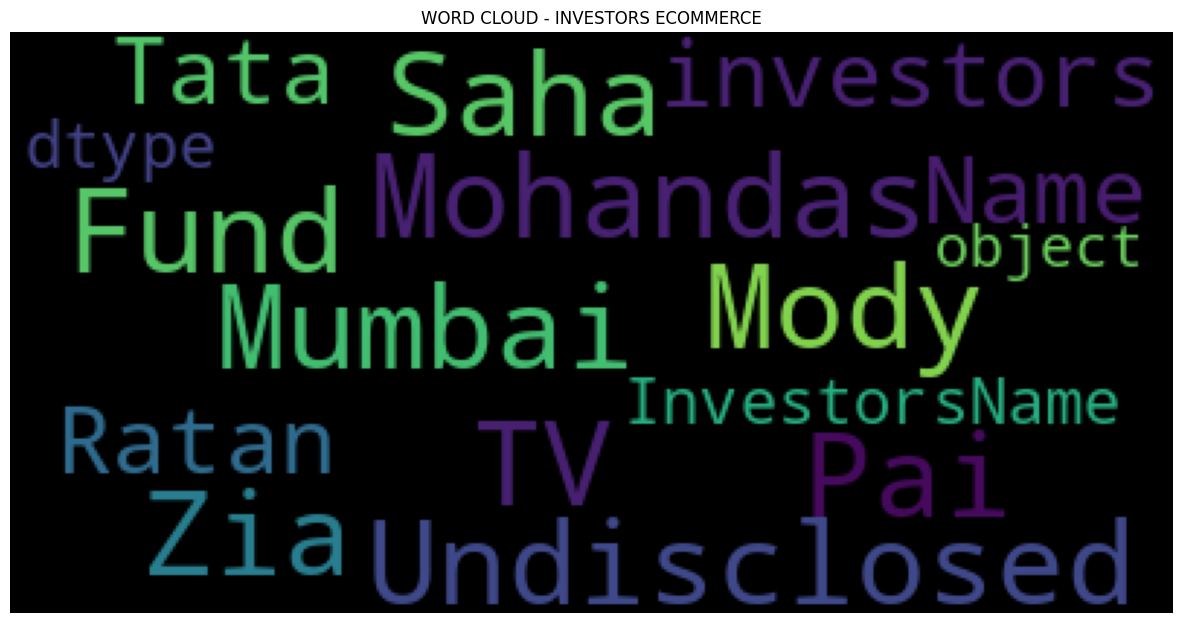

In [47]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(df[df['IndustryVertical'] == 'Ecommerce']['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INVESTORS ECOMMERCE")
plt.axis('off')
plt.show()

Wordcloud for Technology Investors

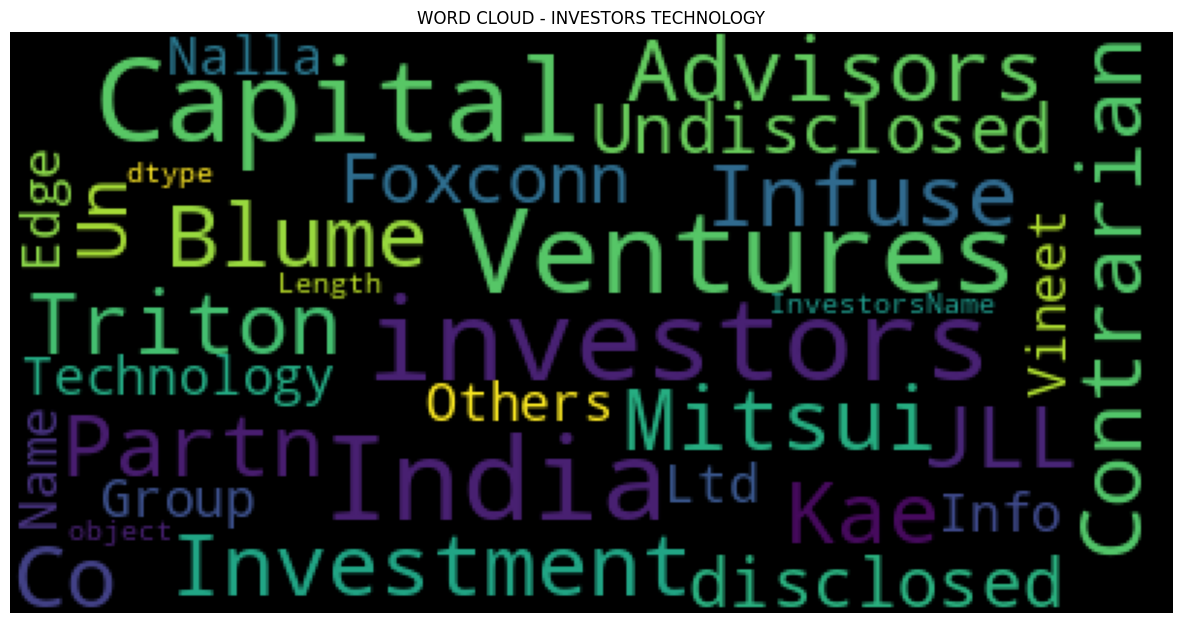

In [50]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40,
                          random_state=42
                         ).generate(str(df[df['IndustryVertical'] == 'Technology']['InvestorsName']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - INVESTORS TECHNOLOGY")
plt.axis('off')
plt.show()

Wordcloud for Investors in Consumer Internet

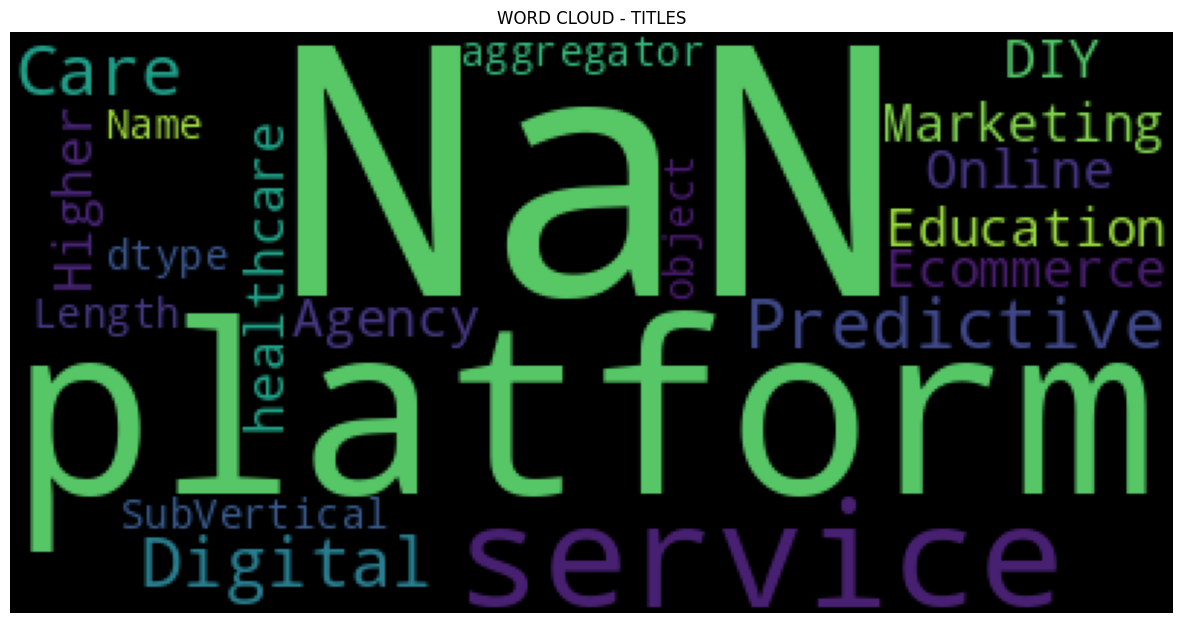

In [51]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1500,
                          max_font_size=120,
                          random_state=42
                         ).generate(str(df['SubVertical']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

We can see there is a lot of missing data in this case as NAN is one of the most freqent words

This was my exploratory analysis of this dataset. It gave quite a lot understanding of the funding situation in startups in the country.